<a href="https://colab.research.google.com/github/ishidesigns/ML-Minor-Image-Classification/blob/main/Minor_Prj(Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.5 ms


In [ ]:
import numpy as np # for calculations
import os # for folder selection 
import matplotlib.pyplot as plt # for displaying images and graphs
from skimage.io import imread # reading images
from skimage.transform import resize # resizing and flattening images

time: 930 ms


In [ ]:
# Preprocessing
# features/ data - x
# labels/ target - y

target = []
flatten_data =[]
images = []

data = '/content/drive/MyDrive/ML/Images/dataset'
categories = ['Boots', 'Sport shoes', 'Heels']

for category in categories:
    class_num = categories.index(category)
    path = os.path.join(data, category)
    
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))

        resized_img = resize(img_array,(150,150,3))  # resizing
        flatten_data.append(resized_img.flatten()) # flattening
        images.append(resized_img)
        target.append(class_num)

flatten_data = np.array(flatten_data)
target = np.array(target)
images = np.array(images)


time: 1min 19s


In [ ]:
len(flatten_data[0]) # 150*150*3

67500

time: 5.95 ms


In [ ]:
x = flatten_data
y = target

time: 814 µs


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)

time: 254 ms


In [ ]:
"""
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)
"""

time: 318 ms


## Logistic Regression

In [ ]:
# Logistic Regession
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

parameters = [{'C':np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2', 'l3']}]

logreg_cv = GridSearchCV(logreg, parameters, cv = 10)
logreg_cv.fit(x_train, y_train)
print('best tuned hyperpaameters:', logreg_cv.best_params_)
print('accuracy:', logreg_cv.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

best tuned hyperpaameters: {'C': 0.001, 'penalty': 'l2'}
accuracy: 0.7045454545454546
time: 6min


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model = LogisticRegression(C = 0.001, penalty = 'l2')
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

time: 5.76 s


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1,
       0])

time: 18.6 ms


In [ ]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

time: 2.45 ms


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

time: 873 µs


In [ ]:
accuracy = accuracy_score(y_pred,y_test)*100

time: 1.23 ms


In [ ]:
accuracy

64.44444444444444

time: 2.9 ms


In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 8,  1,  1],
       [ 4, 14,  3],
       [ 4,  3,  7]])

time: 4.37 ms


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62        10
           1       0.78      0.67      0.72        21
           2       0.64      0.50      0.56        14

    accuracy                           0.64        45
   macro avg       0.64      0.66      0.63        45
weighted avg       0.67      0.64      0.65        45

time: 9.99 ms


## K Nearest Neighbors

In [ ]:
"""
# K Nearest Neighbours
from sklearn import neighbors

x = flatten_data
y = target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)

model = neighbors.KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

print(y_test)

accuracy = accuracy_score(y_pred,y_test)*100
print(accuracy)

print(confusion_matrix(y_pred,y_test))

print(classification_report(y_pred,y_test))

"""

time: 76.5 ms


## Random Forest Classifier

In [ ]:
"""
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

x = flatten_data
y = target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

print(y_test)

accuracy = accuracy_score(y_pred,y_test)*100
print(accuracy)

print(confusion_matrix(y_pred,y_test))

print(classification_report(y_pred,y_test))

"""

time: 69.9 ms


## Naive Bayes

In [ ]:
"""
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

x = flatten_data
y = target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

print(y_test)

accuracy = accuracy_score(y_pred,y_test)*100
print(accuracy)

print(confusion_matrix(y_pred,y_test))

print(classification_report(y_pred,y_test))

"""

In [ ]:
#saving model
import pickle
pickle.dump(model, open('img_model.p', 'wb'))

time: 6.41 ms


In [ ]:
img_model = pickle.load(open('img_model.p', 'rb'))

time: 2.76 ms


Enter image url: https://img3.junaroad.com/uiproducts/17370382/pri_175_p-1603719567.jpg
(498, 375, 3)
Output: Sport shoes


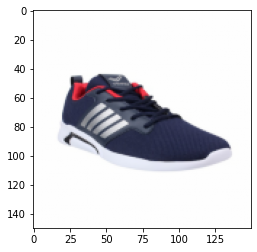

time: 4.52 s


In [ ]:
# testing for a new image
flatten_data = []
url = input("Enter image url: ")
test_img = imread(url)
resized_img = resize(test_img, (150, 150, 3))
flatten_data.append(resized_img.flatten())
flatten_data = np.array(flatten_data)
plt.imshow(resized_img)
print(test_img.shape)
output = img_model.predict(flatten_data)
output  = categories[output[0]]

print(f'Output: {output}')

Enter image url: https://s3-ap-southeast-2.amazonaws.com/assets-novo-co-nz/images/00cjd782i_w433_h433.jpg
(433, 433, 3)
Output: Heels


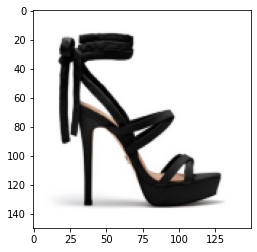

time: 4.84 s


In [ ]:
# testing for a new image
flatten_data = []
url = input("Enter image url: ")
test_img = imread(url)
resized_img = resize(test_img, (150, 150, 3))
flatten_data.append(resized_img.flatten())
flatten_data = np.array(flatten_data)
plt.imshow(resized_img)
print(test_img.shape)
output = img_model.predict(flatten_data)
output  = categories[output[0]]

print(f'Output: {output}')

Enter image url: https://blowfishshoes.com/wp-content/uploads/2020/09/Boot-and-Booties_Drop-Down-copy-1024x831.jpg
(831, 1024, 3)
Output: Boots


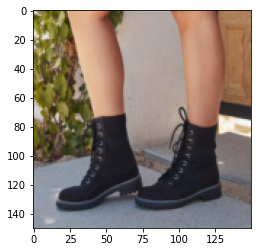

time: 3.95 s


In [ ]:
# testing for a new image
flatten_data = []
url = input("Enter image url: ")
test_img = imread(url)
resized_img = resize(test_img, (150, 150, 3))
flatten_data.append(resized_img.flatten())
flatten_data = np.array(flatten_data)
plt.imshow(resized_img)
print(test_img.shape)
output = img_model.predict(flatten_data)
output  = categories[output[0]]

print(f'Output: {output}')